# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    print(df)

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()
leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

                ID  LATITUDE  LONGITUDE  ELEVATION STATE  \
0      AE000041196   25.3330    55.5170       34.0   NaN   
1      AEM00041194   25.2550    55.3640       10.4   NaN   
2      AEM00041217   24.4330    54.6510       26.8   NaN   
3      AEM00041218   24.2620    55.6090      264.9   NaN   
4      AFM00040990   31.5000    65.8500     1010.0   NaN   
5      AG000060390   36.7167     3.2500       24.0   NaN   
6      AG000060590   30.5667     2.8667      397.0   NaN   
7      AG000060611   28.0500     9.6331      561.0   NaN   
8      AG000060680   22.8000     5.4331     1362.0   NaN   
9      AGE00147708   36.7200     4.0500      222.0   NaN   
10     AGE00147710   36.7500     5.1000        9.0   NaN   
11     AGE00147716   35.1000    -1.8500       83.0   NaN   
12     AGE00147718   34.8500     5.7200      125.0   NaN   
13     AGE00147719   33.7997     2.8900      767.0   NaN   
14     AGM00060351   36.7950     5.8740       11.0   NaN   
15     AGM00060353   36.8170     5.8830 

In [ ]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df.head()

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df = df.sort_values(by=['ID','Date'])
df.head()

,ID,Date,Element,Data_Value
55067,USC00200032,2005-01-01,TMIN,-28
55102,USC00200032,2005-01-01,TMAX,67
112671,USC00200032,2005-01-02,TMAX,122
112708,USC00200032,2005-01-02,TMIN,-6
104159,USC00200032,2005-01-03,TMIN,11


In [4]:
df['Year'], df['MM-DD'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
df = df[df['MM-DD'] != '02-29']
df.head()

,ID,Date,Element,Data_Value,Year,MM-DD
55067,USC00200032,2005-01-01,TMIN,-28,2005,01-01
55102,USC00200032,2005-01-01,TMAX,67,2005,01-01
112671,USC00200032,2005-01-02,TMAX,122,2005,01-02
112708,USC00200032,2005-01-02,TMIN,-6,2005,01-02
104159,USC00200032,2005-01-03,TMIN,11,2005,01-03


In [11]:
df['Year'].max()

'2015'

In [33]:
temp_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('MM-DD').agg({'Data_Value':np.min})
temp_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('MM-DD').agg({'Data_Value':np.max})
temp_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01-01 to 12-31
Data columns (total 1 columns):
Data_Value    365 non-null int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [30]:
tp_min_15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('MM-DD').agg({'Data_Value':np.min})
tp_max_15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('MM-DD').agg({'Data_Value':np.max})
tp_max_15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 01-01 to 12-31
Data columns (total 1 columns):
Data_Value    365 non-null int64
dtypes: int64(1)
memory usage: 5.7+ KB


In [36]:
broken_max = np.where(temp_max_15['Data_Value'] > temp_max['Data_Value'])
broken_max

(array([ 39, 106, 126, 127, 130, 137, 207, 209, 230, 249, 250, 258, 259,
        260, 270, 271, 292, 305, 306, 307, 308, 309, 321, 340, 341, 342,
        343, 344, 345, 346, 347, 348, 349, 356, 357, 358, 359]),)

In [26]:
broken_min = np.where(temp_min_15['Data_Value'] < temp_min['Data_Value'])
broken_min

(array([  4,  10,  33,  44,  45,  46,  47,  49,  50,  51,  53,  54,  55,
         56,  57,  58,  63,  64,  65,  86,  87,  88, 113, 114, 139, 183,
        239, 289, 290, 291, 292, 313]),)

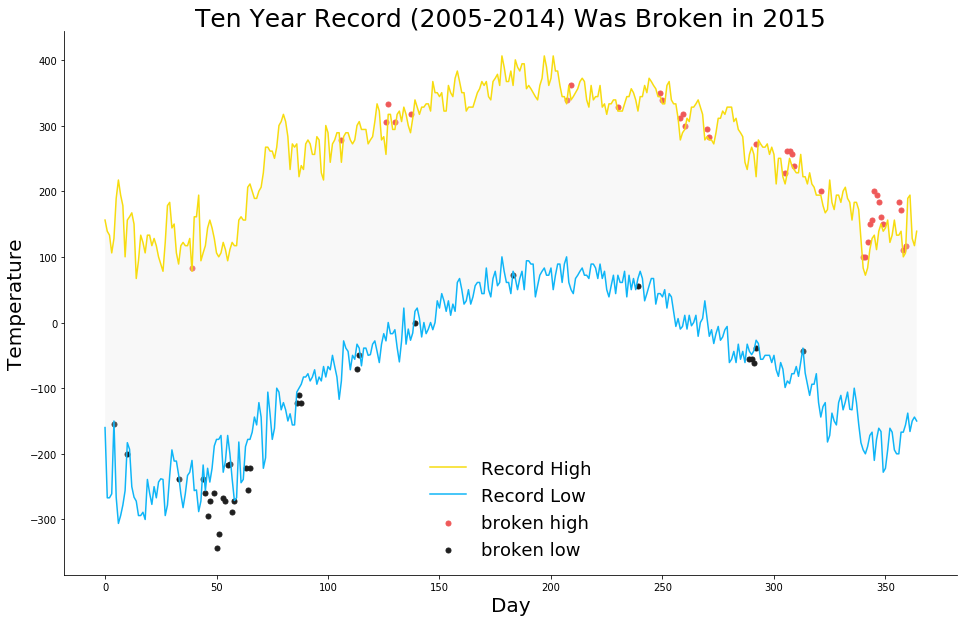

In [49]:
plt.figure(figsize=(16,10))

plt.plot(temp_max.values, c = '#f7dc0f', label ='Record High')
plt.plot(temp_min.values, c = '#0fb5f7', label ='Record Low')

plt.xlabel('Day', fontsize=20)
plt.ylabel('Temperature', fontsize=20)
plt.title('Ten Year Record (2005-2014) Was Broken in 2015', fontsize=25)

plt.scatter(broken_max, temp_max_15.iloc[broken_max], s=25, c='#ef5959', label='broken high')
plt.scatter(broken_min, temp_min_15.iloc[broken_min], s=25, c='#1f1f1f', label='broken low')

plt.gca().fill_between(range(len(temp_max)), 
                       np.array(temp_max.values.reshape(len(temp_min.values),)), 
                       np.array(temp_min.values.reshape(len(temp_min.values),)), 
                       facecolor='#e7e7e7', 
                       alpha=0.25)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(loc = 8, fontsize=18, frameon = False)
plt.show()